In [7]:
import numpy as np
import cv2
import glob

In [2]:
import glob
import numpy as np
import math
import cv2
from cv2 import aruco
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import pprint as pp
import json

In [9]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:9].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob(r'I:\20200720_FloorDetection\18284509_selected\selected\*.png')

In [10]:
print("images: " + str(len(images)))

images: 29


In [11]:
found = 0

0/29
1/29
2/29
3/29
4/29
5/29
6/29
7/29
8/29
9/29
10/29
11/29
12/29
13/29
14/29
15/29
16/29
17/29
18/29
19/29
20/29
21/29
22/29
23/29
24/29
25/29
26/29
27/29
28/29


{'camera_matrix': [[4373.884923600213, 0.0, 661.0350459529014],
  [0.0, 5766.671553628839, 660.044549563753],
  [0.0, 0.0, 1.0]],
 'dist_coeff': [[-11.207245932546167,
   77.09589919695237,
   0.6692018426898482,
   0.25811743530048425,
   -23149.647679769158,
   0.7840098162111694,
   -855.6293687369983,
   -5495.27657032819,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0]]}

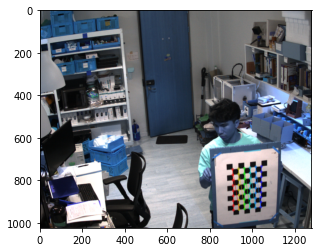

In [12]:
for idx,fname in enumerate(images):  # Here, 10 can be changed to whatever number you like to choose
    img = cv2.imread(fname) # Capture frame-by-frame
    #print(images[im_i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)   # Certainly, every loop objp is the same, in 3D.
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners2, ret)
        found += 1
#         cv2.imshow('img', img)
        plt.imshow(img)
    print(str(idx) + "/" + str(len(images)))
    # calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None,flags = cv2.CALIB_RATIONAL_MODEL )

# transform the matrix and distortion coefficients to writable lists
data = {'camera_matrix': np.asarray(mtx).tolist(),
        'dist_coeff': np.asarray(dist).tolist()}
data

In [13]:
#Using 170 images
camera_matrix = [[4366.468147544356, 0.0, 698.9532053912084],[0.0, 3789.561942373732, 592.5073990607239],[0.0, 0.0, 1.0]],
dist_coeff = [[-8.471758923036978, 746.781535878522,0.27140072223473805,0.41086929694027546,-14358.204234119692]]

#Using 30 selected images
camera_matrix = [[4373.884923600213, 0.0, 661.0350459529014],[0.0, 5766.671553628839, 660.044549563753],[0.0, 0.0, 1.0]],
dist_coeff= [[-11.207245932546167,
   77.09589919695237,
   0.6692018426898482,
   0.25811743530048425,
   -23149.647679769158,
   0.7840098162111694,
   -855.6293687369983,
   -5495.27657032819,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0]]

In [ ]:
mtx = np.array(camera_matrix)
dist = np.array(dist_coeff[0])

In [ ]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_250)
length_of_axis = 0.09
markerLength = 0.18

white_background  = np.full((1024, 1280, 3),255)
# white_background = (np.float32(white_background), cv2.COLOR_RGB2GRAY)


image_data = "./img/000000000000_rendered.png"
frame  = cv2.imread(image_data,cv2.IMREAD_UNCHANGED)
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)


frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)
# frame_markers = aruco.drawDetectedMarkers(white_background.copy(), corners, ids)

rvecs,tvecs, objPts = aruco.estimatePoseSingleMarkers(corners, markerLength , mtx, dist)
imaxis = aruco.drawDetectedMarkers(frame.copy(), corners, ids)
# imaxis = aruco.drawDetectedMarkers(white_background, corners, ids)


# for i in range(len(rvecs)):
#     imaxis = aruco.drawAxis(imaxis, mtx, dist, rvecs[i], tvecs[i], length_of_axis)


# # Marker data to dictionary
# marker_dict = {}

# for idx,marker_index in enumerate(ids):
#     marker_index = marker_index[0]
#     _vecs = {}
#     _vecs["rvec"] = rvecs[idx][0]
#     _vecs["tvec"] = tvecs[idx][0]
#     _vecs["corner"] = corners[idx][0]
#     marker_dict[marker_index] = _vecs
# print("tvecs and rvecs for each marker\n")
# # pp.pprint(marker_dict)

# # def annotateDistanceFromDic(idx0,idx1):

# def getCenterOnImageFromDic(idx):
#     return np.average(marker_dict[idx]["corner"],axis = 0)

# plt.figure()
# plt.figure(figsize=(15,15))
# plt.imshow(imaxis)
# plt.imshow(frame_markers)

# plt.show()

# Calibration with chessboard
RMS: 0.2560086024789014
camera matrix:
 [[1.57870954e+03 0.00000000e+00 6.23938566e+02]
 [0.00000000e+00 1.58409373e+03 5.05489287e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
distortion coefficients:  [-1.61666494e+01  8.38738856e+01 -1.27850069e-03  2.25106550e-03
  1.05010158e+00 -1.57802199e+01  7.76286863e+01  3.35003065e+01]
[[-1.61666494e+01  8.38738856e+01 -1.27850069e-03  2.25106550e-03
   1.05010158e+00 -1.57802199e+01  7.76286863e+01  3.35003065e+01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [3]:
#Using 30 selected images
json_data = {}
with open(r"C:\Users\ZAIO\dev\opencv\samples\python\data.json") as json_file:
    json_data = json.load(json_file)
    pp.pprint(json_data)
    
pp.pprint(json_data['camera_matrix'])
pp.pprint(json_data['dist_coeff'])
    
mtx = np.array(json_data['camera_matrix'])
dist = np.array(json_data['dist_coeff'])

{'camera_matrix': [[1578.709542273069, 0.0, 623.9385657854364],
                   [0.0, 1584.0937333051927, 505.48928692379883],
                   [0.0, 0.0, 1.0]],
 'dist_coeff': [-16.166649352839116,
                83.87388560975475,
                -0.0012785006915881224,
                0.0022510655047158668,
                1.0501015785757686,
                -15.780219927457518,
                77.62868633869827,
                33.50030649545333]}
[[1578.709542273069, 0.0, 623.9385657854364],
 [0.0, 1584.0937333051927, 505.48928692379883],
 [0.0, 0.0, 1.0]]
[-16.166649352839116,
 83.87388560975475,
 -0.0012785006915881224,
 0.0022510655047158668,
 1.0501015785757686,
 -15.780219927457518,
 77.62868633869827,
 33.50030649545333]


In [4]:
import cv2
import numpy as np
import glob

img_array = []
for filename in glob.glob('C:/New folder/Images/*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

NameError: name 'size' is not defined